In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from collections import Counter
from matplotlib import gridspec

%matplotlib inline

pd.set_option('display.max_colwidth', None)

# Plot for ECs and not ECs valence

## Minority

In [2]:
minority_labels = {
    "circumcision   foreskin   mutilation   infant   cut   medical   iceland   ban   procedure   genitals": "Circumcision",
    "rape   woman   men   victim   assault   accused   case   abuse   metoo   son": "Rape",
    "bernier   scheer   conservative   ndp   wynne   carbon   trudeau   candidate   pipeline   poll": "Maxime Bernier",
    "men   woman   gender   feminism   issue   day   gap   masculinity   equality   study": "Gender equality",
    "liberal   meme   reminder   left   cuck   virtue   mccain   laughing   fucking   christmas": "Liberals",
    "trudeau   canadian   justin   cbc   liberal   metacanada   immigration   news   quebec   omar": "Justin Trudeau",
    "police   cop   strike   homeless   shooting   france   worker   pig   slavery   yellow": "Police shooting",
    "white   justice   campus   racism   peterson   diversity   race   privilege   asian   class": "White privilege",
    "muslim   refugee   immigration   terrorist   border   mosque   syria   islamophobia   cbc   quebec": "Muslim refugees",
    "antifa   nazi   fascist   alt   white   protest   group   charlottesville   supremacist   berkeley": "Socio-political protests",
    "censorship   twitter   youtube   mod   speech   hate   kia   ban   subreddit   justice": "OSNs censorship",
    "anarchist   anarchism   capitalism   society   revolution   communist   anarchy   socialism   group   worker": "Anarchism",
    "social   gaming   justice   warrior   gamergate   comic   time   steam   star   point": "Gamergate"
}

ec_labels = {
    "EC" :"EC",
    "non_EC" : "Not_EC"
}

C:\Users\pluez\AppData\Local\Temp\ipykernel_19632\486373112.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap, 5)


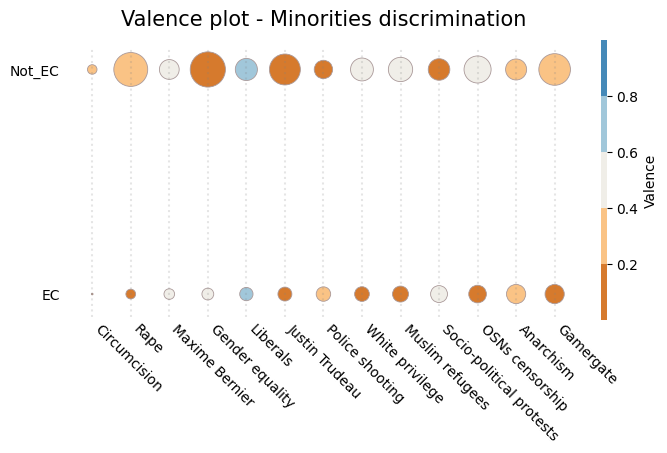

In [3]:
plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_minority.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["labels"] = df1["labels"].replace(minority_labels)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 25

bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

plt.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Minorities discrimination", fontsize=15, y=1.05)


for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=10, length = 0, pad=-10)
for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])

cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/valence_minority.png")
plt.show()

C:\Users\pluez\AppData\Local\Temp\ipykernel_19632\93633827.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap, 5)


<Figure size 640x480 with 0 Axes>

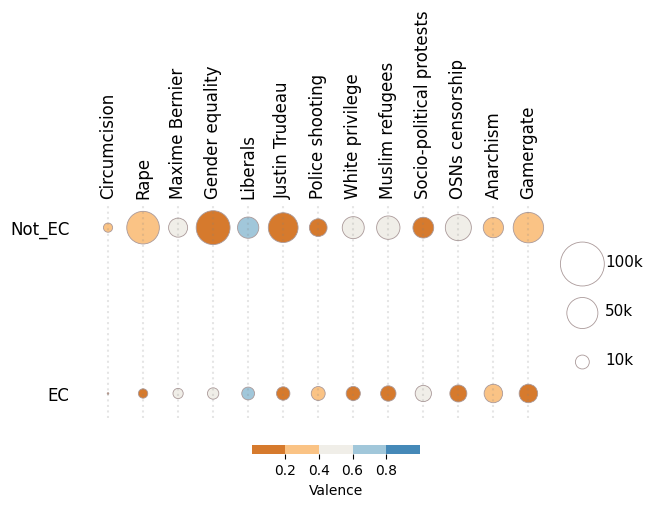

In [4]:
plt.clf()

fig = plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_minority.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["labels"] = df1["labels"].replace(minority_labels)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 27

gs = gridspec.GridSpec(1, 2,width_ratios=[10, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)


pcm = ax1.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
ax1.margins(0.15)
ax1.set_frame_on(False)
ax1.xaxis.tick_top()

ax1.set_xlim([-1.5,  14.5])

for i in range(0, 13):
    ax1.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)


cbar = fig.colorbar(pcm, cmap=cmap, ax=ax1, pad=0.1, orientation="horizontal", fraction=0.1, shrink=0.3)
cbar.set_label('Valence', fontsize=10)
cbar.outline.set_visible(False)
cbar.set_ticks([0.20,0.40,0.60,0.80])
ax1.tick_params(left=True, rotation=90, axis="x",labelsize=12)
ax1.tick_params(pad=-10, axis="y", labelsize=12)
ax1.tick_params(length=0, axis="both")


x = [.2, .2, .2, .2, .2, .2]
y = [.0, .2, .4, .6, .8, 1.0]
r = [ 0,  0, 100, 500, 1000, 0]

ax2.scatter(x, y, s=r, linewidth=0.6, edgecolor='#aa9999', alpha=1, color="#ffffff")
for i in range(len(x)):
    if i not in [0, 1, 5]:
        size = int(r[i]/10)
        ax2.annotate(f"{size}k", (x[i]+0.009, y[i]-0.01), fontsize=11)

ax2.set_frame_on(False)
ax2.tick_params(length=0, labelleft=False, labelbottom=False)
ax2.yaxis.set_label_position("right")

plt.subplots_adjust(wspace=-0.2)
 
plt.savefig("../plot/Valence/valence_area_minority.png")

plt.show()


## GC

In [5]:
guncontrol_dict = {
    "gun   march   infringed   teil   speak   cain   grandson   barney   politixs   poopin": "Guns",
    "wednesday   wheelgun   pew   official   sandw   ruger   colt   wesson   submission   smith": "Wheelgun",
    "tier   sig   rust   beretta   gun   hk   stamp   sauer   pneumatic   kit": "Sig Sauers",
    "war   trump   syria   korea   nuclear   pentagon   iraq   afghanistan   drone   link": "War in Syria",
    "firearm   carry   california   ban   check   permit   ffl   court   day   transfer": "Gun control",
    "ak   garand   cz   scar   friday   buy   black   cerakote   rifle   tactical": "AK-47",
    "rifle   colt   winchester   cleaning   carbine   lever   mosin   enfield   browning   serial": "Rifle cleaning",
    "rifle   shooting   firearm   year   shoot   caliber   bullet   gunday   grandfather   identifying": "Rifle shooting",
    "glock   holster   mag   trigger   grip   gun   sig   mandp   ruger   hammer": "Glock",
    "ar   sight   build   rifle   optic   dot   mount   suppressor   scorpion   kit": "AR-15",
    "nra   firearm   amendment   violence   ban   liberal   government   support   democrat   argument": "NRA",
    "range   collection   christmas   happy   thursday   build   sunday   fde   edc   weekend": "Gun collections",
    "range   rifle   ammo   shoot   buy   firearm   target   ar   caliber   trigger": "Shooting range"
}

26 26 26


C:\Users\pluez\AppData\Local\Temp\ipykernel_19632\473890894.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap, 5)


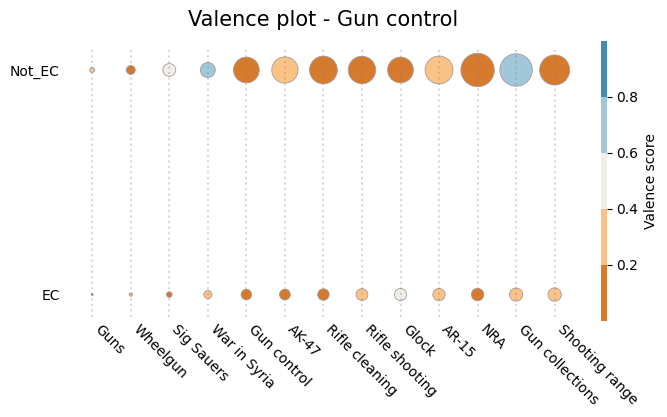

In [12]:
plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_guncontrol.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)
df1["labels"] = df1["labels"].replace(guncontrol_dict)
df1['Volume_scaled'] = df1['Volume']

df1["Volume_scaled"] /= 27

# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)


print(len(df1.labels), len(df1), len(df1.Volume_scaled))
plt.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Gun control", fontsize=15, y=1.05)

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=10, length = 0, pad=-10)


for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.3)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence score')#, cmap='PuOr')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/valence_guncontrol.png")
plt.show()

C:\Users\pluez\AppData\Local\Temp\ipykernel_30900\803178827.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap, 5)


<Figure size 640x480 with 0 Axes>

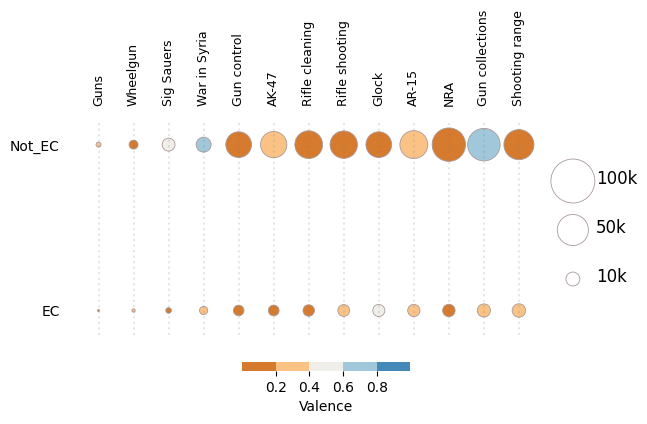

In [ ]:
plt.clf()

import matplotlib.pyplot as pltù
from matplotlib import gridspec
%matplotlib inline 

fig = plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_guncontrol.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["labels"] = df1["labels"].replace(guncontrol_dict)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 27

gs = gridspec.GridSpec(1, 2,width_ratios=[10, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)


pcm = ax1.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
ax1.margins(0.15)
ax1.set_frame_on(False)
ax1.xaxis.tick_top()

ax1.set_xlim([-1.5,  14.5])

for i in range(0, 13):
    ax1.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)


cbar = fig.colorbar(pcm, cmap=cmap, ax=ax1, pad=0.1, orientation="horizontal", fraction=0.1, shrink=0.3)
cbar.set_label('Valence', fontsize=10)
cbar.outline.set_visible(False)
cbar.set_ticks([0.20,0.40,0.60,0.80])
ax1.tick_params(left=True, rotation=90, axis="x", pad=10, labelsize=9)
ax1.tick_params(pad=-10, axis="y", labelsize=10)
ax1.tick_params(length=0, axis="both")


####################

x = [.2, .2, .2, .2, .2, .2]
y = [.0, .2, .4, .6, .8, 1.0]
r = [ 0,  0, 100, 500, 1000, 0]

ax2.scatter(x, y, s=r, linewidth=0.6, edgecolor='#aa9999', alpha=1, color="#ffffff")
for i in range(len(x)):
    if i not in [0, 1, 5]:
        size = int(r[i]/10)
        ax2.annotate(f"{size}k", (x[i]+0.009, y[i]-0.01), fontsize=12)

ax2.set_frame_on(False)
ax2.tick_params(length=0, labelleft=False, labelbottom=False)
ax2.yaxis.set_label_position("right")

plt.subplots_adjust(wspace=-0.2)
 
plt.savefig("../plot/Valence/valence_area_guncontrol.png")

plt.show()


## Politics

In [ ]:
politics_labels = {
    "moore   bannon   tucker   anthem   coulter   jones   protest   kaepernick   bowl   kneeling": "NFL, Kneeling",
    "obamacare   rand   ryan   senate   trumpcare   ron   medicare   medicaid   democrat   reform": "Obamacare",
    "kavanaugh   pelosi   mccain   schumer   kamala   judge   senate   nominee   booker   accuser": "Brett Kavanaugh",
    "korea   trump   syria   kim   tillerson   omar   missile   strike   yemen   israeli": "War in Syria",
    "christmas   soundcloud   ep   missing   peterson   jordan   meme   truth   snowflake   thanksgiving": "Holidays greetings",
    "abortion   transgender   elizabeth   trump   vaccine   feminist   harassment   ban   smollett   accused": "Abortion",
    "border   immigration   wall   enforcement   cortez   mexico   marijuana   daca   rico   caravan": "Border wall",
    "libertarian   government   nigger   thing   conservative   party   tax   american   libertarianism   freedom": "Libertarian",
    "sander   republican   voter   senate   dems   governor   georgia   fraud   cruz   district": "Midterm elections",
    "tax   climate   trump   china   cut   budget   wage   tariff   coal   federal": "Trump politics",
    "news   donald   twitter   obama   cnn   fox   missing   conservative   press   speech": "News",
    "mueller   fbi   investigation   putin   flynn   email   session   manafort   cohen   impeachment": "Robert Mueller",
    "student   speech   shooting   racist   antifa   protest   shapiro   charlottesville   violence   left": "Shootings in schools"
}

C:\Users\pluez\AppData\Local\Temp\ipykernel_30900\3200307075.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap, 5)


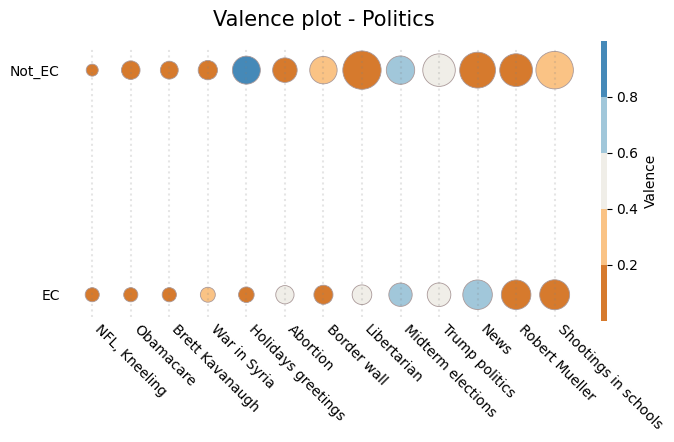

In [ ]:
plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_politics.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)
df1["labels"] = df1["labels"].replace(politics_labels)
df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 27

# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

plt.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Politics", fontsize=15, y=1.05)

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=10, length = 0, pad=-10)

for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/valence_politics.png")
plt.show()

C:\Users\pluez\AppData\Local\Temp\ipykernel_30900\692350314.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap, 5)


<Figure size 640x480 with 0 Axes>

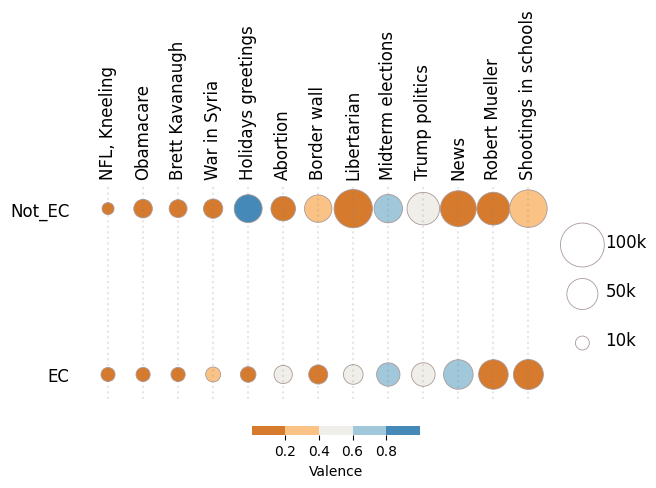

In [ ]:
plt.clf()

import matplotlib.pyplot as pltù
from matplotlib import gridspec
%matplotlib inline 

fig = plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_politics.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["labels"] = df1["labels"].replace(politics_labels)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 27

gs = gridspec.GridSpec(1, 2,width_ratios=[10, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)


pcm = ax1.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
ax1.margins(0.15)
ax1.set_frame_on(False)
ax1.xaxis.tick_top()

ax1.set_xlim([-1.5,  14.5])

for i in range(0, 13):
    ax1.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)


cbar = fig.colorbar(pcm, cmap=cmap, ax=ax1, pad=0.1, orientation="horizontal", fraction=0.1, shrink=0.3)
cbar.set_label('Valence', fontsize=10)
cbar.outline.set_visible(False)
cbar.set_ticks([0.20,0.40,0.60,0.80])
ax1.tick_params(left=True, rotation=90, axis="x",labelsize=12)
ax1.tick_params(pad=-10, axis="y", labelsize=12)
ax1.tick_params(length=0, axis="both")


####################

x = [.2, .2, .2, .2, .2, .2]
y = [.0, .2, .4, .6, .8, 1.0]
r = [ 0,  0, 100, 500, 1000, 0]

ax2.scatter(x, y, s=r, linewidth=0.6, edgecolor='#aa9999', alpha=1, color="#ffffff")
for i in range(len(x)):
    if i not in [0, 1, 5]:
        size = int(r[i]/10)
        ax2.annotate(f"{size}k", (x[i]+0.009, y[i]-0.01), fontsize=12)

ax2.set_frame_on(False)
ax2.tick_params(length=0, labelleft=False, labelbottom=False)
ax2.yaxis.set_label_position("right")

plt.subplots_adjust(wspace=-0.2)
 
plt.savefig("../plot/Valence/valence_area_politics.png")


# Valence in top ECs

## Guncontrol

In [ ]:
plt.clf()

import matplotlib.pyplot as pltù
from matplotlib import gridspec
%matplotlib inline 

plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/valence_post_minority.csv")
df1 = df1.sort_values(by=["EC_val", "Volume"], ascending = True)
df1["labels"] = df1["labels"].replace(minority_labels)
df1["EC_val"] = df1["EC_val"].replace(ec_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 27

gs = gridspec.GridSpec(1, 2,width_ratios=[10, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)


pcm = ax1.scatter(x="labels", y="EC_val", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
ax1.margins(0.15)
ax1.set_frame_on(False)
ax1.xaxis.tick_top()

ax1.set_xlim([-1.5,  14.5])

for i in range(0, 13):
    ax1.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)


cbar = fig.colorbar(pcm, cmap=cmap, ax=ax1, pad=0.1, orientation="horizontal", fraction=0.1, shrink=0.3)
cbar.set_label('Valence', fontsize=10)
cbar.outline.set_visible(False)
cbar.set_ticks([0.20,0.40,0.60,0.80])
ax1.tick_params(left=True, rotation=90, axis="x",labelsize=12)
ax1.tick_params(pad=-10, axis="y", labelsize=12)
ax1.tick_params(length=0, axis="both")


####################

x = [.2, .2, .2, .2, .2, .2]
y = [.0, .2, .4, .6, .8, 1.0]
r = [ 0,  0, 100, 500, 1000, 0]

ax2.scatter(x, y, s=r, linewidth=0.6, edgecolor='#aa9999', alpha=1, color="#ffffff")
for i in range(len(x)):
    if i not in [0, 1, 5]:
        size = int(r[i]/10)
        ax2.annotate(f"{size}k", (x[i]+0.009, y[i]-0.01), fontsize=11)

ax2.set_frame_on(False)
ax2.tick_params(length=0, labelleft=False, labelbottom=False)
ax2.yaxis.set_label_position("right")

plt.subplots_adjust(wspace=-0.2)
 

plt.savefig("../plot/Valence/top_EC_guncontrol.png")
plt.show()

## Minority

In [ ]:
plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/top_ec_valence_post_minority.csv")
df1 = df1.sort_values(by="Volume", ascending = True)
df1["labels"] = df1["labels"].replace(minority_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 10
# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

print(len(df1.labels), len(df1))
plt.scatter(x="labels", y="community", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Minorities discrimination ECs", fontsize=20, y=1.05)


for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=11, length = 0, pad=-30)

for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')#, cmap='PuOr')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/top_EC_minority.png")
plt.show()

## Politics

In [ ]:
plt.figure(figsize=(7.16,3.5))

df1 = pd.read_csv("../results/top_ec_valence_post_politics.csv")
df1 = df1.sort_values(by="Volume", ascending = True)
df1["labels"] = df1["labels"].replace(politics_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 10

# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

print(len(df1.labels), len(df1))
plt.scatter(x="labels", y="community", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Politics ECs", fontsize=20, y=1.05)

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=11, length = 0, pad=-30)

for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')#, cmap='PuOr')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

# plt.savefig("../plot/Valence/top_EC_minority.png")
plt.show()

# Top non EC

## Guncontrol


In [ ]:
plt.figure(figsize=(14,5))

df1 = pd.read_csv("../results/top_non_ec_valence_post_guncontrol.csv")
df1 = df1.sort_values(by="Volume", ascending = True)
df1["labels"] = df1["labels"].replace(guncontrol_dict)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 10

# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

print(len(df1.labels), len(df1))
plt.scatter(x="labels", y="community", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Gun control Not ECs", fontsize=20, y=1.05)

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=11, length = 0, pad=-30)

for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')#, cmap='PuOr')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/top_not_EC_minority.png")
plt.show()

## Minority

In [ ]:
df1.head()

In [ ]:
plt.figure(figsize=(14,5))

df1 = pd.read_csv("../results/top_non_ec_valence_post_minority.csv")
df1 = df1.sort_values(by="Volume", ascending = True)
df1["labels"] = df1["labels"].replace(minority_labels)

df1['Volume_scaled'] = df1['Volume']
df1["Volume_scaled"] /= 10

# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

print(len(df1.labels), len(df1))
plt.scatter(x="labels", y="community", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Minorities discrimination Not ECs", fontsize=20, y=1.05)

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=11, length = 0, pad=-30)

for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')#, cmap='PuOr')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/top_not_EC_minority.png")
plt.show()

In [ ]:
df1.community.unique()

In [ ]:
plt.figure(figsize=(14,5))

df1 = pd.read_csv("../results/top_non_ec_valence_post_politics.csv")
df1 = df1.sort_values(by="Volume", ascending = True)
df1['Volume_scaled'] = df1['Volume']
df1["labels"] = df1["labels"].replace(politics_labels)

df1["Volume_scaled"] /= 10

# COLOR BAR
bounds = [0,0.2, 0.4, 0.6, 0.8,1]
cmap = mpl.colors.ListedColormap(['#D67A2D','#FAC385', '#F0EEE8', '#A1C7DA', '#4589B8'])
cmap = plt.cm.get_cmap(cmap, 5)

print(len(df1.labels), len(df1))
plt.scatter(x="labels", y="community", s="Volume_scaled", c="Valence", cmap=cmap, data=df1, vmin=0, vmax=1, linewidth=0.6, edgecolor='#aa9999')
plt.margins(0.1)
plt.title("Valence plot - Politics Not ECs", fontsize=20, y=1.05)


for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.xticks(rotation = -45, ha="left") 
plt.tick_params(axis='both', labelsize=10, length = 0)
plt.tick_params(axis='y', labelsize=11, length = 0, pad=-30)

for i in range(0, len(df1.labels.unique())):
    plt.axvline(x = i, color = 'grey', linestyle="dotted", alpha=0.2)

cax = plt.axes([0.9, 0.1, 0.008, 0.8])
# COLORBAR
cb = plt.colorbar(cax=cax, cmap=cmap,aspect=100, label='Valence')#, cmap='PuOr')
cb.outline.set_visible(False)
cb.set_ticks([0.20,0.40,0.60,0.80])

plt.savefig("../plot/Valence/top_not_EC_minority.png")
plt.show()